In [1]:
import csv

In [88]:
import pandas as pd
import numpy as np
from collections import Counter

In [89]:
import matplotlib.pyplot as plt
import networkx as nx

In [90]:
#path = '../../bert-cmp/bert/'
path = '../graph_cls/'

In [103]:
prefix='MSRC_21'

In [104]:
results_df = pd.read_csv(path+'cls_output-no-lm-'+prefix+'/test_results.tsv', header=None, sep='\t')
results_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.027983,0.079788,0.036235,0.023015,0.065610,0.043837,0.052609,0.055141,0.029711,0.049585,...,0.035592,0.045377,0.052197,0.042461,0.029877,0.049065,0.059313,0.057875,0.023566,0.021527
1,0.082299,0.040789,0.077948,0.062490,0.031518,0.034720,0.037025,0.035525,0.095922,0.033952,...,0.041695,0.033751,0.027364,0.068650,0.033005,0.041409,0.051750,0.051339,0.029467,0.026703
2,0.032876,0.055980,0.046175,0.029865,0.054967,0.066957,0.064695,0.055646,0.039173,0.055304,...,0.038458,0.044789,0.065258,0.046748,0.023493,0.048465,0.043368,0.054927,0.021698,0.020615
3,0.031383,0.054110,0.034033,0.028100,0.069831,0.047403,0.057749,0.082137,0.033190,0.044436,...,0.042111,0.044177,0.047025,0.043393,0.029789,0.048610,0.058187,0.053505,0.024899,0.028315
4,0.029956,0.060813,0.046997,0.026556,0.085200,0.047002,0.056402,0.049594,0.028837,0.052252,...,0.036659,0.040185,0.045348,0.045102,0.028286,0.056712,0.056932,0.054910,0.023694,0.021604
5,0.032505,0.050670,0.060178,0.029576,0.043828,0.036130,0.045985,0.041704,0.034196,0.041549,...,0.028658,0.035186,0.044895,0.036150,0.035234,0.041594,0.049718,0.059555,0.031673,0.029378
6,0.103993,0.040298,0.066262,0.071247,0.028470,0.039297,0.036226,0.035376,0.104617,0.035680,...,0.041949,0.031776,0.035615,0.066399,0.032411,0.034684,0.034398,0.046455,0.032355,0.028351
7,0.032741,0.075311,0.043249,0.029438,0.045879,0.047930,0.057232,0.051124,0.038082,0.067939,...,0.040822,0.046295,0.065309,0.059787,0.023003,0.051813,0.047852,0.060252,0.021338,0.018432
8,0.054265,0.047404,0.050633,0.048070,0.033149,0.046264,0.051029,0.042253,0.072159,0.044815,...,0.035738,0.084483,0.038417,0.061949,0.041061,0.040599,0.048070,0.044206,0.024852,0.027938
9,0.026146,0.054937,0.048305,0.025034,0.053544,0.036021,0.047155,0.045463,0.026715,0.041865,...,0.029586,0.038165,0.045176,0.034079,0.036344,0.044400,0.056563,0.058041,0.030263,0.028583


In [105]:
results_df.shape

(112, 22)

In [106]:
vocab_label_df = pd.read_csv(path+prefix+'-vocab_label.txt', header=None)
vocab_label_df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [107]:
n=10
preds = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])

In [108]:
preds

[[1, 4, 11, 18, 10, 19, 7, 6, 14, 9],
 [8, 0, 2, 15, 3, 18, 19, 12, 17, 1],
 [5, 14, 6, 1, 7, 9, 4, 19, 17, 11],
 [7, 4, 18, 6, 11, 1, 19, 17, 5, 14],
 [4, 11, 1, 18, 17, 6, 19, 9, 7, 5],
 [10, 11, 2, 19, 1, 18, 6, 14, 4, 7],
 [8, 0, 3, 15, 2, 19, 12, 1, 5, 6],
 [1, 9, 14, 19, 15, 6, 17, 7, 5, 18],
 [13, 8, 15, 0, 6, 2, 3, 18, 1, 5],
 [10, 11, 19, 18, 1, 4, 2, 6, 7, 14],
 [10, 19, 8, 2, 11, 6, 5, 14, 4, 0],
 [13, 2, 15, 18, 9, 1, 6, 11, 5, 19],
 [10, 1, 11, 4, 19, 18, 6, 14, 7, 9],
 [1, 14, 9, 15, 19, 7, 6, 17, 4, 18],
 [18, 10, 2, 11, 19, 17, 15, 1, 4, 16],
 [2, 8, 0, 3, 15, 19, 18, 17, 10, 12],
 [0, 8, 15, 3, 2, 19, 1, 18, 12, 7],
 [8, 0, 3, 15, 2, 19, 12, 5, 18, 6],
 [18, 4, 11, 1, 17, 7, 19, 13, 15, 6],
 [4, 11, 18, 6, 17, 5, 10, 7, 19, 9],
 [9, 14, 19, 15, 6, 1, 18, 17, 7, 2],
 [18, 4, 1, 11, 13, 17, 19, 7, 15, 6],
 [12, 17, 1, 15, 5, 2, 0, 19, 7, 4],
 [8, 0, 3, 15, 2, 19, 12, 18, 5, 6],
 [1, 14, 9, 19, 15, 6, 7, 17, 5, 13],
 [9, 14, 1, 19, 15, 6, 17, 18, 7, 5],
 [8, 0, 15, 2, 3, 

In [109]:
label_df = pd.read_csv(path+prefix+'_label_val.txt', header=None)
label_df.shape

(112, 1)

In [110]:
labels= []; labels_str =[]

for idx, row in label_df.iterrows():
    labels.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
    labels_str.append(row[0])

In [111]:
labels_str

[1,
 2,
 5,
 7,
 11,
 10,
 3,
 9,
 8,
 10,
 5,
 13,
 18,
 1,
 18,
 2,
 3,
 3,
 11,
 4,
 9,
 18,
 12,
 8,
 14,
 9,
 6,
 13,
 0,
 15,
 8,
 3,
 17,
 1,
 9,
 16,
 8,
 13,
 7,
 9,
 10,
 10,
 17,
 11,
 0,
 18,
 5,
 18,
 6,
 1,
 11,
 6,
 10,
 15,
 12,
 5,
 2,
 19,
 12,
 12,
 10,
 7,
 12,
 15,
 3,
 9,
 3,
 1,
 5,
 17,
 3,
 5,
 14,
 17,
 4,
 7,
 4,
 13,
 17,
 9,
 10,
 17,
 2,
 6,
 0,
 11,
 6,
 7,
 10,
 18,
 19,
 4,
 15,
 12,
 5,
 7,
 7,
 17,
 19,
 19,
 11,
 15,
 5,
 12,
 16,
 4,
 13,
 18,
 14,
 17,
 5,
 6]

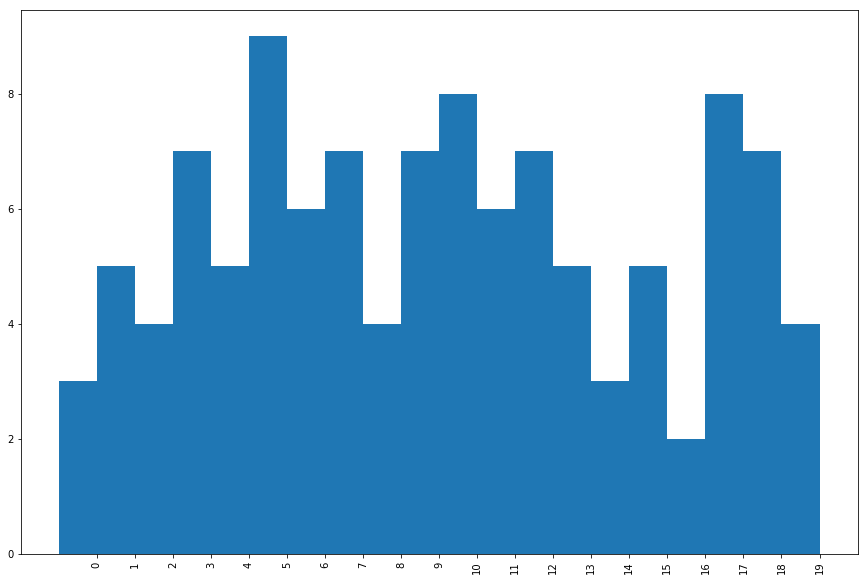

In [112]:
c = Counter(labels_str)

plt.figure(figsize=(15,10))
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.show()

In [113]:
pred_str = []; score = 0; rank = []
for idx, r in enumerate(preds):
    #print(snippet.loc[idx][0])
    print("Label =", labels_str[idx])
    preds_ = []
    print("Pred  =")
    correct = False
    for i in range(1):
        p = vocab_label_df.loc[r[i]][0] 
        if str(p)==str(labels_str[idx]):
            score +=1
            rank.append(i+1)
            print("---- {}. {}".format(i,p))
            correct = True
        else:
            print("     {}. {}".format(i,p))
        preds_.append(p)
    if correct == False:
        rank.append(i)
    pred_str.append(preds_)
    print()

Label = 1
Pred  =
---- 0. 1

Label = 2
Pred  =
     0. 8

Label = 5
Pred  =
---- 0. 5

Label = 7
Pred  =
---- 0. 7

Label = 11
Pred  =
     0. 4

Label = 10
Pred  =
---- 0. 10

Label = 3
Pred  =
     0. 8

Label = 9
Pred  =
     0. 1

Label = 8
Pred  =
     0. 13

Label = 10
Pred  =
---- 0. 10

Label = 5
Pred  =
     0. 10

Label = 13
Pred  =
---- 0. 13

Label = 18
Pred  =
     0. 10

Label = 1
Pred  =
---- 0. 1

Label = 18
Pred  =
---- 0. 18

Label = 2
Pred  =
---- 0. 2

Label = 3
Pred  =
     0. 0

Label = 3
Pred  =
     0. 8

Label = 11
Pred  =
     0. 18

Label = 4
Pred  =
---- 0. 4

Label = 9
Pred  =
---- 0. 9

Label = 18
Pred  =
---- 0. 18

Label = 12
Pred  =
---- 0. 12

Label = 8
Pred  =
---- 0. 8

Label = 14
Pred  =
     0. 1

Label = 9
Pred  =
---- 0. 9

Label = 6
Pred  =
     0. 8

Label = 13
Pred  =
---- 0. 13

Label = 0
Pred  =
---- 0. 0

Label = 15
Pred  =
     0. 8

Label = 8
Pred  =
---- 0. 8

Label = 3
Pred  =
     0. 8

Label = 17
Pred  =
     0. 10

Label = 1
Pred  =


In [114]:
score/len(preds)

0.5446428571428571